In [1]:
from skimage.morphology import reconstruction
from skimage.morphology import opening

from scipy import stats


import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
train_img_path       = "../data/Training-Dataset/Images/"
train_mask_path      = "../data/Training-Dataset/Masks-Ideal/"
train_pred_mask_path = "../data/Training-Dataset/Predicted-Masks/"

valid_img_path       = "../data/Validation-Dataset/Images/"
valid_mask_path      = "../data/Validation-Dataset/Masks-Ideal/"
valid_pred_mask_path = "../data/Validation-Dataset/Predicted-Masks/"

In [3]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images[filename.split('.')[0]] = img  #remove extension from file name
    return images

In [4]:
masks       = load_images_from_folder(train_mask_path)

In [5]:
valid_masks      = load_images_from_folder(valid_mask_path)
valid_pred_masks = load_images_from_folder(valid_pred_mask_path)

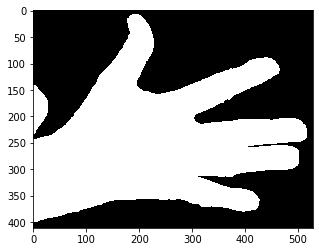

In [6]:
plt.imshow(255-masks['5_P_hgr1_id04_2'])
plt.show()

In [9]:
def handDescomposition(masks, plot=False):
    accuracy = 0
    
    for key in masks.keys():
        #invert color for viz purpose
        mask = 255-masks[key][:,:,0].copy()
        
        hand = opening(mask, np.ones((50,50)))
        
        #top-hat
        fingers = mask-hand
        fingers = cv2.erode(fingers, None, iterations=5)
        
        #fingers-components above given area-threashold            
        components = cv2.connectedComponentsWithStats(np.uint8(fingers), connectivity=4)
        thd = min(max(components[2][1:, 4])//2,1000)
        num_corners = sum(components[2][1:,4]>thd)
            
        if plot:       
            plt.imshow(mask, cmap='gray')
            plt.show()
            plt.imshow(fingers, cmap='gray')
            plt.show()
            plt.imshow(components, cmap='gray')
            plt.show()
    
        if num_corners == int(key[0]): accuracy += 1
        
    return accuracy/len(masks.keys())

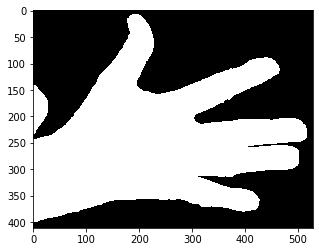

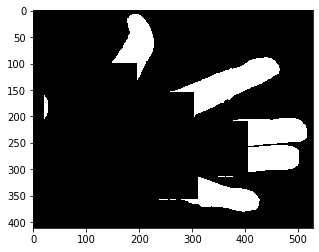

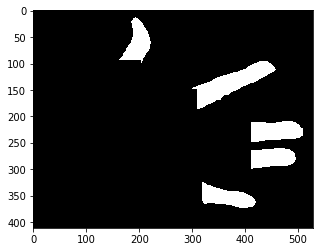

1.0

In [10]:
handDescomposition({'5_P_hgr1_id04_2':masks['5_P_hgr1_id04_2']},plot=True)

In [13]:
handDescomposition(masks)

0.8

In [12]:
handDescomposition(valid_pred_masks)

0.717391304347826